c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

Epoch 1/20 - Train Accuracy: 59.30%, Test Accuracy: 60.82%, Train Loss: 0.6390, Test Loss: 0.6213
Epoch 2/20 - Train Accuracy: 84.67%, Test Accuracy: 86.55%, Train Loss: 0.6079, Test Loss: 0.5873
Epoch 3/20 - Train Accuracy: 84.42%, Test Accuracy: 86.55%, Train Loss: 0.5835, Test Loss: 0.5596
Epoch 4/20 - Train Accuracy: 87.69%, Test Accuracy: 87.72%, Train Loss: 0.5605, Test Loss: 0.5388
Epoch 5/20 - Train Accuracy: 89.95%, Test Accuracy: 91.23%, Train Loss: 0.5387, Test Loss: 0.5144
Epoch 6/20 - Train Accuracy: 89.20%, Test Accuracy: 91.81%, Train Loss: 0.5213, Test Loss: 0.4950
Epoch 7/20 - Train Accuracy: 90.45%, Test Accuracy: 90.64%, Train Loss: 0.5073, Test Loss: 0.4810
Epoch 8/20 - Train Accuracy: 87.44%, Test Accuracy: 91.81%, Train Loss: 0.5055, Test Loss: 0.4749
Epoch 9/20 - Train Accuracy: 90.20%, Test Accuracy: 92.98%, Train Loss: 0.4854, Test Loss: 0.4568
Epoch 10/20 - Train Accuracy: 89.95%, Test Accuracy: 92.40%, Train Loss: 0.4775, Test Loss: 0.4473
Epoch 11/20 - Train

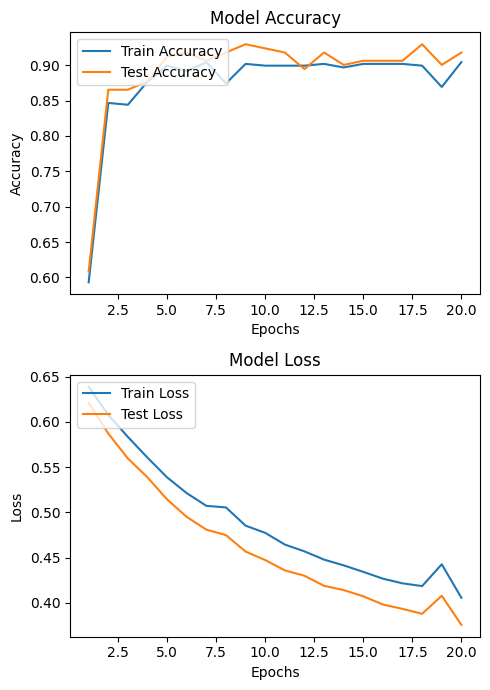

Confusion Matrix: 
 [[99  3]
 [11 58]]
Accuracy:  91.81286549707602
Report: 
               precision    recall  f1-score   support

           B       0.90      0.97      0.93       102
           M       0.95      0.84      0.89        69

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



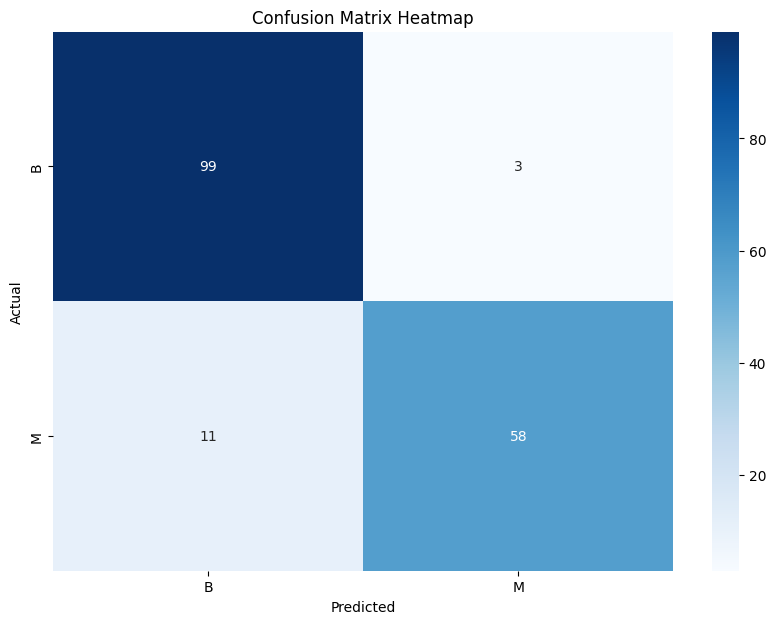

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
import seaborn as sns

# Function to import data
def importdata():
    balance_data = pd.read_csv(r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\data4.csv', sep=',', header=None)
    return balance_data

# Function to split the dataset into features and target variables
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.values[:, 2:]
    Y = balance_data.values[:, 1]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

# Function to calculate and print accuracy
def cal_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Report: \n", classification_report(y_test, y_pred))
    # Plotting the confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Import the data
balance_data = importdata()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = splitdataset(balance_data)

# Create the logistic regression model with warm_start=True to keep previous training progress
clf = LogisticRegression(max_iter=1, warm_start=True, solver='saga')

# Variables to store accuracy and loss over epochs
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

# Number of epochs
epochs = 20

for epoch in range(epochs):
    clf.fit(X_train, y_train)

    # Calculating train accuracy
    train_pred = clf.predict(X_train)
    train_pred_proba = clf.predict_proba(X_train)

    # Calculating test accuracy
    test_pred = clf.predict(X_test)
    test_pred_proba = clf.predict_proba(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_loss = log_loss(y_train, train_pred_proba)
    test_loss = log_loss(y_test, test_pred_proba)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1}/{epochs} - Train Accuracy: {train_acc * 100:.2f}%, Test Accuracy: {test_acc * 100:.2f}%, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plotting the accuracy and loss values over epochs
plt.figure(figsize=(5,7))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Make predictions for the final model
y_pred = clf.predict(X_test)

# Calculate and print final accuracy
cal_accuracy(y_test, y_pred)
